# HW6  Starter Code

## For Q1


In [30]:
using Pkg
Pkg.add("JuMP")
Pkg.add("HiGHS")
Pkg.add("Ipopt")
Pkg.add("LinearAlgebra")
Pkg.add("Gurobi")

    Updating registry at `C:\Users\X\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\X\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\X\.julia\environments\v1.8\Manifest.toml`


In [12]:
using JuMP, HiGHS, Ipopt
using LinearAlgebra

M = 20
N = 100

# generate the random polyhedron

b = rand(M)*100 
A = rand(M,N)*4 .- 2

# model for 1-norm projection
norm1 = Model(HiGHS.Optimizer) 

# here define variables for 1-norm projection
@variable(norm1, x1[1:N])

# model for 2-norm projection
norm2 = Model(Ipopt.Optimizer) 

# here define variables for 2-norm projection
@variable(norm2, x2[1:N])

# model for infinity-norm projection
norm_inf = Model(HiGHS.Optimizer) 

# here define variables for infinity-norm projection
@variable(norm_inf, x3[1:N])

# use these commands to suppress diagnostic output
set_silent(norm1)
set_silent(norm2)
set_silent(norm_inf)

# do "iteration" tests of random points to see what fraction are in the polyhedron

count_in=0
iteration = 1000

# Here insert "iteration" random trials for points and check to see whether they are in P. 
# Increment count_in if they are. 
# save a point x_hat that is NOT in P
# Calculate prob_in_P.

x_hat = zeros(N)
x_h = rand(iteration, N)*2 .- 1

i = 1
for i in 1:iteration
    if (all(A * x_h[i, :] .<= b))
        count_in = count_in + 1
    else
        x_hat = x_h[i, :]
    end
end
prob_in_P = count_in / iteration

print("probability of point in polyhedron = ",prob_in_P)

# here define constraints for the three projection models 

# define z_norm2 to be the SQUARE of the 2-norm distance to P
# define z_norm1 to be the 1-norm distance to P
# define z_norm_inf to be the inf-norm distance to P

@variable(norm1, t[1:N])
@constraint(norm1, A * x1[1:N] .<= b)
@expression(norm1, z_norm1, sum(t[i] for i in 1:N))
for i in 1:N
    @constraint(norm1, -t[i] <= x1[i] - x_hat[i])
    @constraint(norm1, x1[i] - x_hat[i] <= t[i])
end

@constraint(norm2, A * x2[1:N] .<= b)
@expression(norm2, z_norm2, sum((x2[i] - x_hat[i])^2 for i in 1:N))

@constraint(norm_inf, A * x3[1:N] .<= b)
@variable(norm_inf, t)
@expression(norm_inf, z_norm_inf, t)
@constraint(norm_inf, -t .<= x3 - x_hat)
@constraint(norm_inf, x3 - x_hat .<= t)
    
# solve the three models and print results.

print("\n************** norm2 **************\n")
@objective(norm2, Min, z_norm2)
optimize!(norm2);
print("2-norm distance to P is ",sqrt(value(z_norm2)))

print("\n************** norm1 **************\n")
@objective(norm1, Min, z_norm1)
optimize!(norm1);
print("1-norm distance to P is ", value(z_norm1))
    
print("\n************** norm inf **************\n")
@objective(norm_inf, Min, z_norm_inf)
optimize!(norm_inf);
print("inf-norm distance to P is ",value(z_norm_inf))
    
print("\n**********************************\n")

probability of point in polyhedron = 0.381
************** norm2 **************
2-norm distance to P is 0.6235422930265528
************** norm1 **************
1-norm distance to P is 3.50827854331937
************** norm inf **************
inf-norm distance to P is 0.07351893237112722
**********************************


## For Q2
### Eigenvectors and eigenvalues

### a)

$ v = $$\left[
   \begin{matrix}
   x \\
   y \\
   z \\
\end{matrix}
\right] $,
$ Q = $$\left[
   \begin{matrix}
   2 & 2 & -3 \\
   2 & 6 & -3 \\
   -3 & -3 & 2 \\
\end{matrix}
\right] $.

### b)

The eigenvalues of Q is about $\left[
   \begin{matrix}
   -1.099 \\
  1.999 \\
  9.099 \\
\end{matrix}
\right]$, which are not all large equal to 0, so Q is not positive semidefinite, so it is not an ellipsoid.

In [12]:
using LinearAlgebra

A = [2 2 -3; 2 6 -3; -3 -3 2]

# use eigvals() to get the eigenvalues of a matrix
eigvals(A)

3-element Vector{Float64}:
 -1.0990195135927852
  1.9999999999999998
  9.099019513592784

In [13]:
# we can also use eigen() to obtain its eigenvalues and eigenvectors
# here L is the array of eigen values, U is the matrix of eigenvectors
(L, U) = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 -1.0990195135927703
  2.0000000000000036
  9.099019513592784
vectors:
3×3 Matrix{Float64}:
 -0.641359  -0.639602  -0.423754
 -0.138236   0.639602  -0.756175
 -0.754685   0.426401   0.49863

### c)

$v^TQv = v^TU
$$\left[
   \begin{matrix}
   -1.099 & 0 & 0\\
  0 & 1.999 & 0 \\
  0 & 0 & 9.099 \\
\end{matrix}
\right]
U^Tv = v^TU
$$\left[
   \begin{matrix}
   0 & 0 & 0\\
  0 & 1.999 & 0 \\
  0 & 0 & 9.099 \\
\end{matrix}
\right]
U^Tv - v^TU
$$\left[
   \begin{matrix}
   1.099 & 0 & 0\\
  0 & 0 & 0 \\
  0 & 0 & 0 \\
\end{matrix}
\right]
U^Tv = v^TQ_1v - v^TQ_2v = ||Q_1^{1/2}v||^2 - ||Q_2^{1/2}v||^2$,

$U = $$\left[
   \begin{matrix}
   -0.641359 & -0.639602 & -0.423754 \\
 -0.138236 & 0.639602 & -0.756175 \\
 -0.754685 & 0.426401 & 0.49863 \\
\end{matrix}
\right]$.

So,

$A = U\lambda_1^{1/2}U^T, B = U\lambda_2^{1/2}U^T $, culculated as below:

In [24]:
(L, U) = eigen(A)
lambda1 = diagm([0, L[2], L[3]])
lambda2 = diagm([L[1]*(-1), 0, 0])
a = U * sqrt(lambda1) * transpose(U)

3×3 Matrix{Float64}:
  1.1202     0.388029  -1.02306
  0.388029   2.30335   -0.751666
 -1.02306   -0.751666   1.00712

In [25]:
b = U * sqrt(lambda2) * transpose(U)

3×3 Matrix{Float64}:
 0.431226   0.0929445  0.507422
 0.0929445  0.0200328  0.109368
 0.507422   0.109368   0.597082

### d)

Because the first eigenvalue is negative, so $x, y, z$ can be in that direction to make the magnitude large and satisfy the constraint, which is $\left[
   \begin{matrix}
   -0.641359 \\
 -0.138236 \\
 -0.754685 \\
\end{matrix}
\right]$. $x, y, z$ can be multiple of it.

## For Q3

### 1. Plotting

In [34]:
using PyPlot, CSV, DataFrames

data = CSV.read("lasso_data.csv", DataFrame)
x = data[:,1]
y = data[:,2]

function plotpoints()
    plot(x, y, ".");
    xlabel("x"); ylabel("y");
    n=size(data, 1);
end

plotpoints (generic function with 1 method)

In [64]:
# plot a line on top of it

f(x) = -6 * x + 1.8;

# points of the line
xs = range(0.1, 0.5, length=100);
ys = f.(xs);

function plot2(xs, ys, d)
    # plot the scatters again
    # plot(x, y, ".");
    plotpoints()
    # plot the line
    plot(xs,ys,"-");
    title(string("polynomial fit (deg=", d, ") ")); # using ordinary least squares it is not!
    # xlabel("x"); ylabel("y");
end

plot2 (generic function with 1 method)

### a)

The magnitudes of the coefficients in the resulting polynomial fits are large.

In [65]:
using Gurobi

# Order of polynomial used for fitting
k = 5

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(Gurobi.Optimizer)

@variable(m, u[1:k+1])
@objective(m, Min, sum( (y - A*u).^2 ) )

optimize!(m)

println(value.(u))

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-24
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 0 rows, 6 columns and 0 nonzeros
Model fingerprint: 0x5170d1f1
Model has 21 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [9e-01, 1e+01]
  QObjective range [2e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 6 columns, 0 nonzeros
Presolved model has 21 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 11
 AA' NZ     : 1.000e+01
 Factor NZ  : 1.500e+01
 Factor Ops : 5.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal      

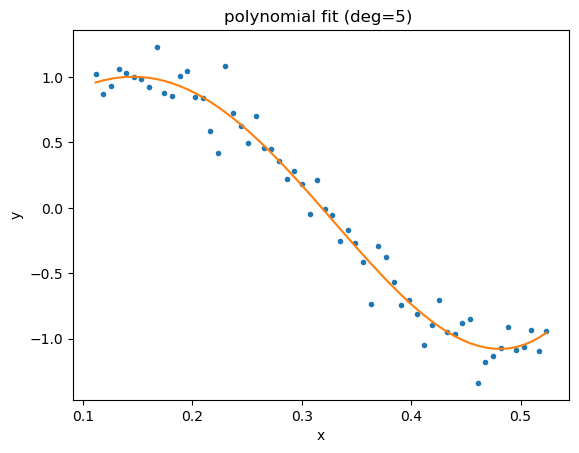

PyObject Text(0.5, 1.0, 'polynomial fit (deg=5) ')

In [66]:
plot2(x, value.(A*u), 5)

In [67]:
using Gurobi

# Order of polynomial used for fitting
k = 15

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(Gurobi.Optimizer)

@variable(m, u[1:k+1])
@objective(m, Min, sum( (y - A*u).^2 ) )

optimize!(m)

u = A\y

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-24
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 0 rows, 16 columns and 0 nonzeros
Model fingerprint: 0xb0d3a865
Model has 136 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [6e-04, 1e+01]
  QObjective range [2e-08, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 16 columns, 0 nonzeros
Presolved model has 136 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 24
 AA' NZ     : 2.800e+01
 Factor NZ  : 3.600e+01
 Factor Ops : 2.040e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal  

16-element Vector{Float64}:
       8.10196734771287e11
      -2.711203586668869e12
       3.414033253041093e12
      -1.1828012881790938e12
      -1.9910418508955015e12
       3.3098175101053374e12
      -2.588031315622572e12
       1.313321578703679e12
      -4.700347018226031e11
       1.2226835359193762e11
      -2.3274602520483597e10
       3.2112202895422864e9
      -3.1250932858722436e8
       2.0323937244193077e7
 -791829.5776914086
   13959.473392449543

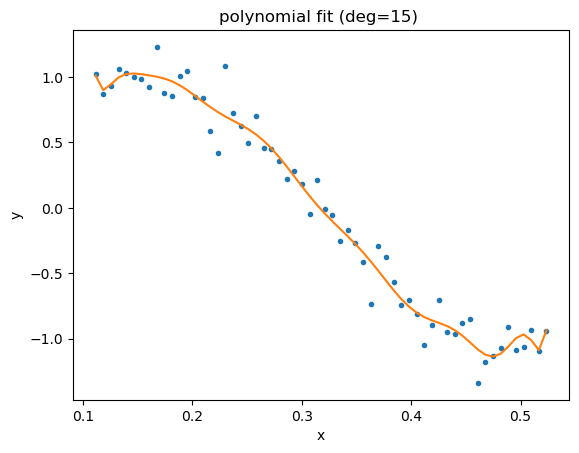

PyObject Text(0.5, 1.0, 'polynomial fit (deg=15) ')

In [68]:
plot2(x, value.(A*u), 15)

### b)

The fit is more smooth. The magnitudes of the coefficients become smaller.

In [69]:
lambda = 1e-6

# Order of polynomial used for fitting
k = 15

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(Gurobi.Optimizer)

@variable(m, u[1:k+1])
@objective(m, Min, sum( (y - A*u).^2 )+lambda * sum(u.^2) )

optimize!(m)

u = value.(u)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-24
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 0 rows, 16 columns and 0 nonzeros
Model fingerprint: 0xbc5f72a2
Model has 136 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [6e-04, 1e+01]
  QObjective range [9e-08, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 16 columns, 0 nonzeros
Presolved model has 136 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 31
 AA' NZ     : 1.050e+02
 Factor NZ  : 1.200e+02
 Factor Ops : 1.240e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal  

16-element Vector{Float64}:
  -0.5678886387696518
  -0.934125691797301
  -1.4894063560214876
  -2.2752867235667322
  -3.266879495767818
  -4.253387313194705
  -4.621193052728553
  -3.055094758523602
   2.6232774943328967
  14.708534820390213
  32.18768266640952
  42.66479301924787
  15.60090251702806
 -58.101276059176634
  15.382605620637523
  -0.06959120627288001

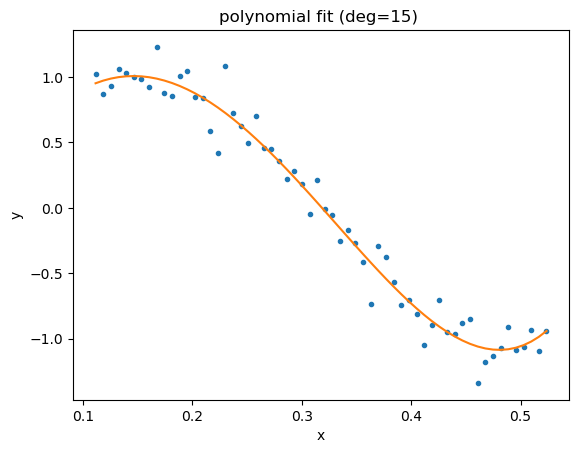

PyObject Text(0.5, 1.0, 'polynomial fit (deg=15) ')

In [71]:
plot2(x, value.(A*u), 15)

### c)

In [131]:
lambda = 1e-0

# Order of polynomial used for fitting
k = 15

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

m = Model(Gurobi.Optimizer)

@variable(m, u[1:k+1])
@variable(m, t[1:k+1])
@objective(m, Min, sum( (y - A*u).^2 )+lambda * sum(t) )
@constraint(m, u .<= t)
@constraint(m, -t .<= u)

optimize!(m)

u = value.(u)
# for i in 1:k+1
#     if u[i] < 1e-5
#         u[i] = 0
#     end
# end
# print(u)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-24
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 32 rows, 32 columns and 64 nonzeros
Model fingerprint: 0xa1ca4f9c
Model has 136 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e-04, 1e+01]
  QObjective range [2e-08, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 16 rows and 0 columns
Presolve time: 0.00s
Presolved: 16 rows, 32 columns, 32 nonzeros
Presolved model has 136 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 24
 AA' NZ     : 1.270e+02
 Factor NZ  : 3.000e+02
 Factor Ops : 4.900e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective 

16-element Vector{Float64}:
 -2.7917517461287066e-14
 -5.6039444416987185e-14
 -1.1279132309722764e-13
 -2.276608514731771e-13
 -3.495482091251415e-13
 -7.129221540683442e-13
 -1.458730383012584e-12
 -2.993176591752737e-12
 -6.151692356995637e-12
 -1.2621897502447347e-11
 -2.397131129709997e-11
 -4.958719545788298e-11
 -2.0830236849187128e-10
 -4.294555879000765e-9
 -5.687326027562717
  1.779104386213138

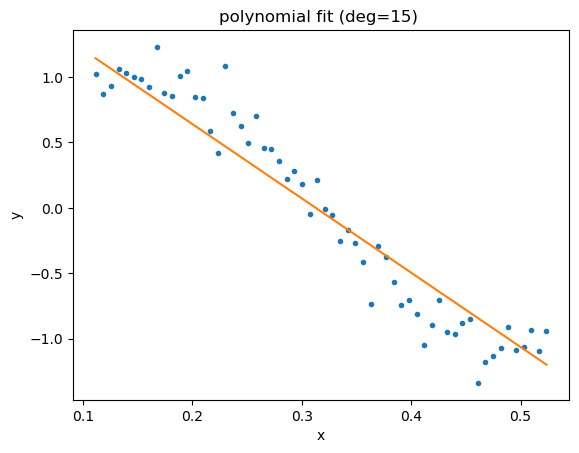

PyObject Text(0.5, 1.0, 'polynomial fit (deg=15) ')

In [132]:
plot2(x, value.(A*u), 15)